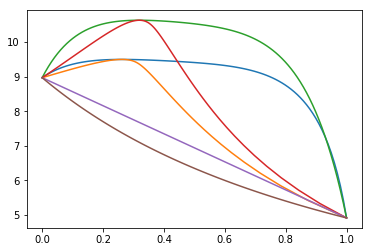

In [1]:
#Bolha dado T

import numpy as np
from scipy import optimize as opt
from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot as plt
%matplotlib inline

def calc_Psat(T):
    Psat0 = np.exp( 16 - 4800/(T+273.15))
    Psat1 = np.exp( 13 - 3600/(T+273.15))
    return Psat0, Psat1

def calc_gamma(T,x):
    gamma0 = np.exp((1 + 2e-3*(T+273.15))*(x[1]**2))
    gamma1 = np.exp((1 + 2e-3*(T+273.15))*(x[0]**2))
    return gamma0, gamma1

def calc_fi(T,P):
    fi1 = np.exp(150e0*P/(8.31447*(T+273.15)))
    fi2 = np.exp(300e0*P/(8.31447*(T+273.15)))
    return fi1, fi2

def Pbol_fi(T,x):
    y = np.zeros(2)
    Psat = calc_Psat(T)
    gamma = calc_gamma(T,x)
    fi_sat0, _ = calc_fi(T,Psat[0])
    _, fi_sat1 = calc_fi(T,Psat[1])
    
    P = Psat[0]*x[0]*gamma[0] + Psat[1]*x[1]*gamma[1]
    K = np.zeros(2)
    y = np.zeros(2)
    K_tot = 0
    for i in range (0,2):
        K[i] = Psat[i]*gamma[i]/P
        K_tot += K[i]

    y[:] = K[:]*x[:]
    
    fi = calc_fi(T,P)    
    Res = 1000
    
    while (Res>1e-10):
        K_tot_old = K_tot
        P = x[0]*Psat[0]*gamma[0]*fi_sat0/fi[0] + x[1]*Psat[1]*gamma[1]*fi_sat1/fi[1]
        K_tot = 0
        K[0] = Psat[0]*gamma[0]*fi_sat0/(P * fi[0])
        K[1] = Psat[1]*gamma[1]*fi_sat1/(P * fi[1])
        K_tot = K[0] + K[1]
        y[:] = K[:]*x[:]
        fi = calc_fi(T,P)
        Res = np.abs(K_tot-K_tot_old)

    return P, y[0]


def Pbol_RaoultMod(T,x):
    y = np.zeros(2)
    Psat = calc_Psat(T)
    gamma = calc_gamma(T,x)
    P = Psat[0]*x[0]*gamma[0] + Psat[1]*x[1]*gamma[1]
    for i in range (0,2):
        y[i] = Psat[i]*gamma[i]*x[i]/P
    
    return P, y[0]

def Pbol_Raoult(T,x):
    y = np.zeros(2)
    Psat = calc_Psat(T)
    P = Psat[0]*x[0] + Psat[1]*x[1]
    for i in range (0,2):
        y[i] = Psat[i]*x[i]/P
    return P, y[0]



x_ = np.linspace(0,1,100)
x__ = 1 - x_

xf_ = np.concatenate((np.array([x_]).T,np.array([x__]).T),axis=1)
P_axis1 = np.zeros(100)
P_axis2 = np.zeros(100)
P_axis3 = np.zeros(100)
y_axis1 = np.zeros(100)
y_axis2 = np.zeros(100)
y_axis3 = np.zeros(100)

for i in range(0,100):
    P_axis1[i], y_axis1[i] = Pbol_fi(60, xf_[i,:])
    P_axis2[i], y_axis2[i] = Pbol_RaoultMod(60, xf_[i,:])
    P_axis3[i], y_axis3[i] = Pbol_Raoult(60, xf_[i,:])

plt.plot(x_,P_axis1)
plt.plot(y_axis1,P_axis1)

plt.plot(x_,P_axis2)
plt.plot(y_axis2,P_axis2)

plt.plot(x_,P_axis3)
plt.plot(y_axis3,P_axis3)

In [2]:
#Bolha dado P

def calc_inv_Psat(P):
    T_ELV0 = -4800/(np.log(P)-16)
    T_ELV1 = -3600/(np.log(P)-13)
    return T_ELV0, T_ELV1

def calc_K(T,x):
    gamma = calc_gamma(T,x)
    Psat = calc_Psat(T)
    K = np.zeros(2)
    K[0] = Psat[0]*gamma[0]/P
    K[1] = Psat[1]*gamma[1]/P
    return K

def eq_bolha(T,x):
    K = calc_K(T,x)
    return 1 - K(T,x)[0]*x[0] - K(T,x)[0]*x[0]
    
def Tbol(P, x):
    
    y=np.zeros(2)
    
    T_ELV = calc_inv_Psat(P)
    T_guess = x[0]*T_ELV[0] + x[1]*T_ELV[1]
    
    
    T=opt.newton(lambda T: eq_bolha, x0=T_guess, fprime=None, args=(), tol=1.e-8, maxiter=50, fprime2=None)
    Psat = calc_Psat(T)
    
    for i in range (0,2):
        y[i] = Psat[i]*x[i]/(P)
    
    return (T,y)
    
print(Tbol(3, [0.5,0.5]))
print(calc_Psat(273.15))

(312.31735748193529, array([ 407.34568899,  157.48130777]))
(1357.7971063301093, 608.02388640180834)


/home/medeirosfa/anaconda3/lib/python3.6/site-packages/scipy/optimize/zeros.py:173: RuntimeWarning: Tolerance of 0.0313301692397 reached
  warnings.warn(msg, RuntimeWarning)


In [3]:
x_ = np.linspace(0,1,100)
x__ = 1 - x_

xf_ = np.concatenate((np.array([x_]).T,np.array([x__]).T),axis=1)
T_axis1 = np.zeros(100)
y_axis1 = np.zeros(100)

for i in range(0,100):
    T_axis1[i] = Tbol(3, xf_[i,:])
    

/home/medeirosfa/anaconda3/lib/python3.6/site-packages/scipy/optimize/zeros.py:173: RuntimeWarning: Tolerance of 0.0303485734211 reached
  warnings.warn(msg, RuntimeWarning)


ValueError: setting an array element with a sequence.

In [ ]:
#Gráfico PxT

